In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns

In [6]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=',')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [16]:
df['occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [7]:
df.drop(columns='Person ID',inplace=True)

In [8]:
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.isna().sum()

gender                       0
age                          0
occupation                   0
sleep_duration               0
quality_of_sleep             0
physical_activity_level      0
stress_level                 0
bmi_category                 0
blood_pressure               0
heart_rate                   0
daily_steps                  0
sleep_disorder             219
dtype: int64

In [5]:
df.blood_pressure.unique()


array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [9]:
df[['systolic', 'diastolic']
           ] = df.blood_pressure.str.split('/', expand=True)

df['systolic'] = df['systolic'].astype('int')
df['diastolic'] = df['diastolic'].astype('int')
df.drop('blood_pressure', axis=1, inplace=True)

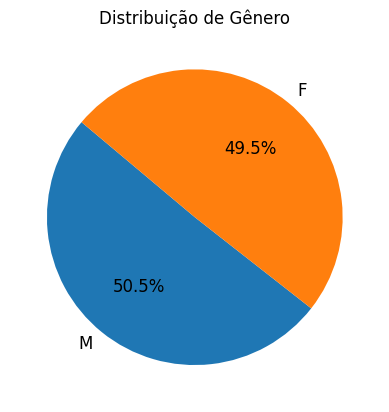

In [12]:
# Assuming the original values in the 'gender' column are 'female' and 'male'
df['gender'] = df['gender'].replace({'Female': 'F', 'Male': 'M'})

plt.pie(df['gender'].value_counts().values,
        labels=df['gender'].value_counts().index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

plt.title('Distribuição de Gênero')

plt.show()

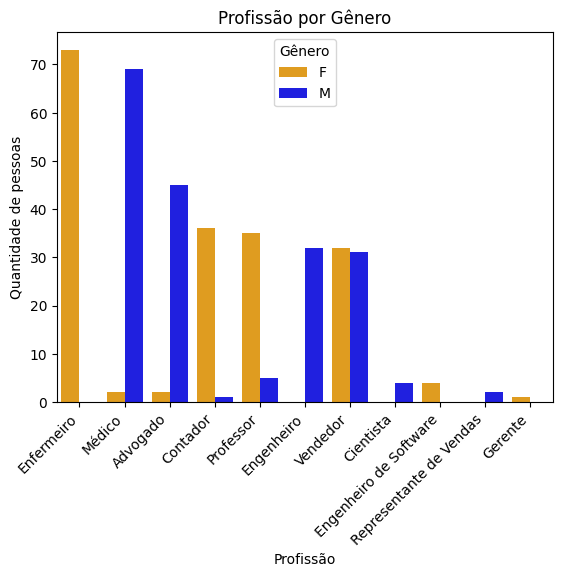

In [23]:
gender_by_occupation = df.groupby(
    ['occupation', 'gender']).size().reset_index(name='count')

gender_colors = {'M': 'blue', 'F': 'orange'}

gender_by_occupation = gender_by_occupation.sort_values(
    by='count', ascending=False)

sns.barplot(y='count', x='occupation', hue='gender', data=gender_by_occupation,
            palette=gender_colors, width=0.8)

plt.title('Profissão por Gênero')
plt.xlabel('Profissão')
plt.ylabel('Quantidade de pessoas')

occupation_names_pt = [
    'Enfermeiro', 'Médico', 'Advogado',  'Contador',  'Professor',
     'Engenheiro', 'Vendedor', 'Cientista',  'Engenheiro de Software', 
      'Representante de Vendas', 'Gerente'
]

plt.xticks(
    ticks=range(len(occupation_names_pt)),
    labels=occupation_names_pt,
    rotation=45,
    ha='right'
)

plt.legend(title='Gênero')

plt.show()


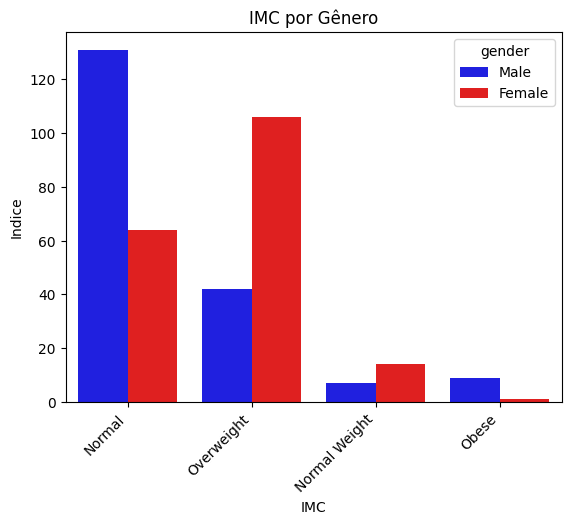

In [9]:
gender_by_bmi = df.groupby(
    ['bmi_category', 'gender']).size().reset_index(name='count')

gender_colors = {'Male': 'blue', 'Female': 'red'}

gender_by_bmi = gender_by_bmi.sort_values(
    by='count', ascending=False)


sns.barplot(y='count', x='bmi_category', hue='gender', data=gender_by_bmi,
            palette=gender_colors, width=0.8)

plt.title('IMC por Gênero')
plt.xlabel('IMC')
plt.ylabel('Indice')

plt.xticks(rotation=45, ha='right')


plt.show()

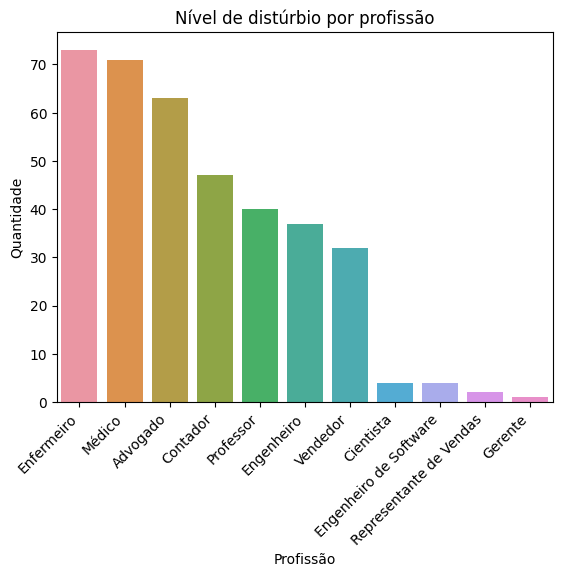

In [25]:
occupation_counts = df['occupation'].value_counts(
).sort_values(ascending=False)


sns.barplot(x=occupation_counts.index, y=occupation_counts.values)

plt.xticks(
    ticks=range(len(occupation_names_pt)),
    labels=occupation_names_pt,
    rotation=45,
    ha='right'
)

plt.title('Nível de distúrbio por profissão')
plt.xlabel('Profissão')
plt.ylabel('Quantidade')

plt.xticks(rotation=45, ha='right')

plt.show()

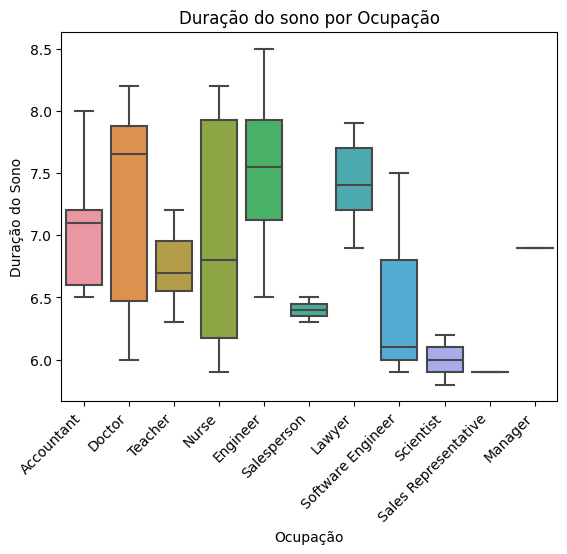

In [11]:
sleep_duration_by_occupation = df.groupby(
    ['sleep_duration', 'occupation']).size().reset_index(name='count')


sleep_duration_by_occupation = sleep_duration_by_occupation.sort_values(
    by='count', ascending=False)


sns.boxplot(y='sleep_duration', x='occupation',
            data=sleep_duration_by_occupation)

plt.title('Duração do sono por Ocupação')
plt.xlabel('Ocupação')
plt.ylabel('Duração do Sono')


plt.xticks(rotation=45, ha='right')

plt.show()

In [29]:
df['sleep_disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [30]:
df['bmi_category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [35]:
translation = {
    'Overweight': 'Sobrepeso',
    'Normal': 'Normal',
    'Obese': 'Obeso',
    'Normal Weight': 'Peso Normal'
}

df['bmi_category'] = df['bmi_category'].replace(translation)



import plotly.express as px

fig = px.violin(df, x="sleep_disorder", y="bmi_category",
                title="IMC por Distúrbio")

# Update font size
fig.update_layout(
    font=dict(size=16)  # Set the desired font size
)

# Update axis titles
fig.update_xaxes(title_text="Distúrbio do sono")
fig.update_yaxes(title_text="IMC")

# Set chart background to white
fig.update_layout(
    plot_bgcolor="white"
)

fig.show()
